First, decide what kind of source you want to observe. 

Second, check your source in stellarium to see how high it gets in the sky and how long during the night it is visible. 

Third, compare the visibility to your observing plan. For example, do you want deep exposures in multiple filters? will your source be up long enough to do that?

Finally, let's check that it is actually observable from McDonald / RUCO. 

In [1]:
# import the necessities 
import numpy as np
from matplotlib import pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.time import Time

import pytz
from pytz import timezone
from datetime import datetime, timedelta

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_airmass, plot_finder_image, plot_sky
from astroplan import (AltitudeConstraint, AirmassConstraint, AtNightConstraint)
from astroplan import MoonSeparationConstraint

import astropy

Step on is to specify the observatory. McDonald Observatory is in the astroplan lookup table so that's easy. 

In [2]:
# for imaging projects 
mcdonald = Observer.at_site('McDonald Observatory')#, timezone='US/Central')
mcdonald

<Observer: name='McDonald Observatory',
    location (lon, lat, el)=(-104.0216666944444 deg, 30.671666694444443 deg, 2074.9999999988677 m),
    timezone=<UTC>>

RUCO is not one of the standard observatories so we have to specify the location parameters ourselves. 

In [3]:
# for spectroscopic projects 
longitude = '-95d24m15.0552s'
latitude = '+29d43m01.7544s'
elevation = 14 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

ruco = Observer(name='RUCO',
               location=location,
#               timezone=timezone('US/Central'),
                timezone=timezone('UTC'),
               description="Rice University Campus Observatory in Houston, TX")
ruco

<Observer: name='RUCO',
    location (lon, lat, el)=(-95.40418199999999 deg, 29.717153999999997 deg, 13.999999999288 m),
    timezone=<UTC>>

Let's say I want to observe the Orion Nebula Cluster, M42. I can create a target object with the name and coordinates (be sure the give the epoch!). Look the coordinates up on Simbad: https://simbad.u-strasbg.fr/simbad/

In [4]:
m42 = FixedTarget(name='M42', coord=SkyCoord('05h35m16.8s', '-05d23m24s', frame='icrs'))


Next, we need to specify the time of our observations. Let's use the first night of the run for now. 

In [5]:
# define our timezone 
texas = timezone('US/Central')

# March 1, using the middle of the night -- note we are using UTC! 
day1_utc = datetime(2024, 3, 2, 6, 0, 0, tzinfo=pytz.utc)
day1_utc.astimezone(texas)

time = Time('2024-03-10 06:00:00')

We can confirm our estimated start time by checking the sunrise / sunset times at McDonald. 

In [6]:
sunset = mcdonald.sun_set_time(time, which='nearest')
sunrise = mcdonald.sun_rise_time(time, which='nearest')

In [7]:
sunset.iso

'2024-03-10 00:56:50.553'

In [8]:
sunrise.iso

'2024-03-10 13:15:11.315'

Let's use this to define a time range for our observations. 

In [9]:
time_range = Time([sunset.iso, sunrise.iso])

For the best data, we want to look through as little of the atmosphere as possible -- we want smaller values for the airmass. The pointing limits of the telescope means that we need the object to be above an airmass of 2. 

<AxesSubplot:xlabel='Time from 2024-03-09 [UTC]', ylabel='Airmass'>

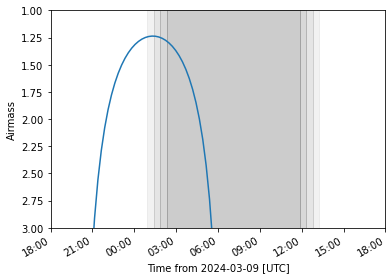

In [10]:
plot_airmass(m42, mcdonald, time, brightness_shading=True) 

We can print out the value of the airmass at a given time. At midnight (note that the plot gives time in UTC!), the airmass of M42 is:

In [11]:
mcdonald.altaz(time, m42).secz 

<Quantity 4.14416685>

Indeed, Orion will have set by midnight on March 1. If we want to observe Orion, it will have to be a the beginning of the night. We can check that by putting in an earlier time. 

In [12]:
mcdonald.altaz(Time('2024-03-1 02:00:00'), m42).secz

<Quantity 1.2371208>

Spring break conflicts with true dark time, so we will also have to contend with the moon. Let's add some moon constraints to our observing plan. 

In [13]:
moon = FixedTarget.from_name('Moon')

We can plot the position of our object and the moon in the sky to make sure that the two do not get too close together. 

<PolarAxesSubplot:>

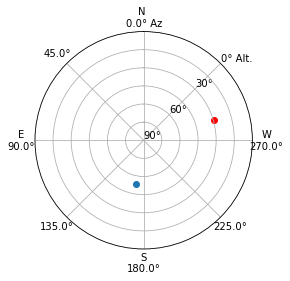

In [14]:
# define the moon as a red dot
moon_style = {'color': 'r'}

plot_sky(m42, mcdonald, sunset)  
plot_sky(moon, mcdonald, sunset, style_kwargs=moon_style)  

We can also plot multiple times over the night to see how our target and the moon move over the night. 

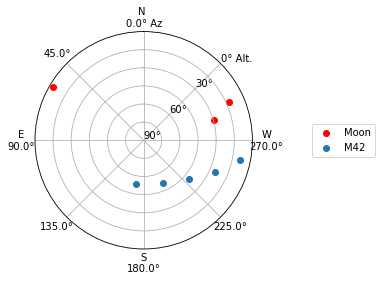

In [15]:
time_window = sunset + (sunrise - sunset) * np.linspace(0, 1, 10)

plot_sky(moon, mcdonald, time_window, style_kwargs=moon_style)  

plot_sky(m42, mcdonald, time_window)  

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))  

plt.show()  

With this in mind, what is the best time to observe your source? 